In [1]:
#! pip install seaborn
#! pip install tqdm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

d:\Mirto\Documenti\Università\Magistrale\Geometria Computazionale\cubic-curve-projective-closure\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Generating point lists (Naive method)

In [3]:
def generateFunctionPoints(function, start=-10, end=10, step=1):
    return [(x, y) for x in tqdm(np.arange(start, end, step)) for y in np.arange(start, end, step) if np.isclose(function(x,y), 0, rtol=10)]

In [4]:
function = lambda x, y: x**2 - y**2 - 1
points = np.array(generateFunctionPoints(function))

print(len(points))

100%|██████████| 20/20 [00:00<00:00, 1538.49it/s]

2


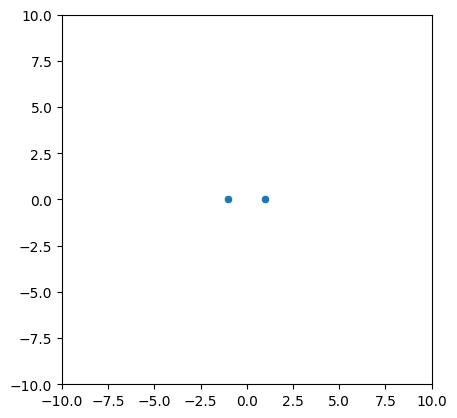

In [5]:
sns.scatterplot(x = points[:,0], y = points[:,1], legend=False)

plt.gca().set_aspect('equal')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

## Generating point lists (Solving for x)

In [6]:
def generateFunctionPoints(coefficients, start=-10, stop=10, step=0.01, showTqdm=True):
    '''
    a*x^3 + b*x^2y + c*xy^2 + d*y^3 + e*x^2 + f*xy + g*y^2 + h*x + i*y + j*1 = 0
    '''
    points = []
    a, b, c, d, e, f, g, h, i ,j = coefficients
    for x in tqdm(np.arange(start, stop, step), disable=not showTqdm):
        yCoefficients = [d, g + c*x, i + b*(x**2)+f*x, j + a*(x**3)+e*(x**2)+h*x]
        for y in cubicSolve(yCoefficients):
            points.append((x,y))
    for y in tqdm(np.arange(start, stop, step), disable=not showTqdm):
        xCoefficients = [a, e + b*y, h + c*(y**2)+f*y, j + d*(y**3)+g*(y**2)+i*y]
        for x in cubicSolve(xCoefficients):
            points.append((x,y))
    return np.array(points)

def cubicSolve(coefficients):
    '''
    Solves for ax^3+bx^2+cx+d=0
    '''
    polinomial = np.polynomial.Polynomial(coefficients[::-1])
    return [root.real for root in polinomial.roots() if abs(root.imag)<1e-5]

In [7]:
# function: x**2 + y**2 - 1 = 0
functionCoefficients = [1, 0, 0, 1, 0, 3, 0, 0, 0, 0]

points = generateFunctionPoints(functionCoefficients, step=0.01)

print(len(points))

100%|██████████| 2000/2000 [00:00<00:00, 13649.65it/s]

4636


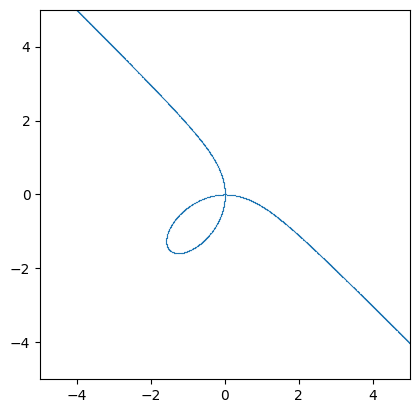

In [8]:
sns.scatterplot(x = points[:,0], y = points[:,1], legend=False,  marker='.', edgecolor=None, s=2)

plt.gca().set_aspect('equal')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

100%|██████████| 2000/2000 [00:00<00:00, 13726.97it/s]


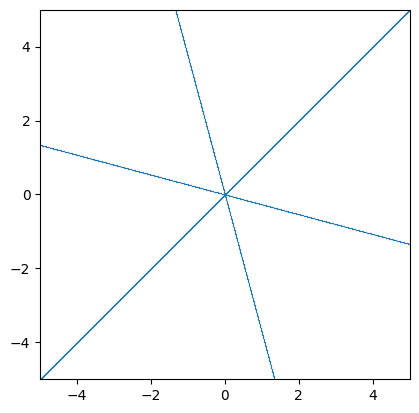

In [9]:
functionCoefficients = [-1, -3, 3, 1, 0, 0, 0, 0, 0, 0]

points = generateFunctionPoints(functionCoefficients, step=0.01)

sns.scatterplot(x = points[:,0], y = points[:,1], legend=False,  marker='.', edgecolor=None, s=2)

plt.gca().set_aspect('equal')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

100%|██████████| 2000/2000 [00:00<00:00, 14149.94it/s]


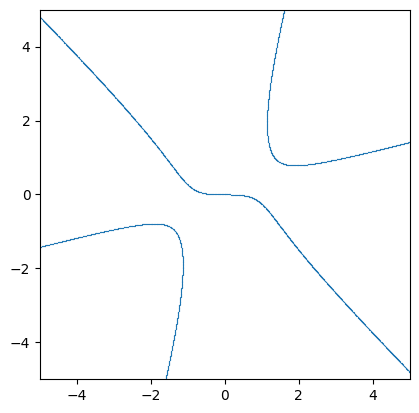

In [10]:
functionCoefficients = [1, -3, -3, 1, 0, 0, 0, 0, 6, 0]

points = generateFunctionPoints(functionCoefficients, step=0.01)

sns.scatterplot(x = points[:,0], y = points[:,1], legend=False,  marker='.', edgecolor=None, s=2)

plt.gca().set_aspect('equal')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

### Drawing for fun

In [11]:
def drawFun(x, i):
    functionCoefficients = [x, 2/x, -3-x, 3, 3*x, -3, 1, 2, -4, 0]

    points = np.array(generateDeprojectedPoints(functionCoefficients, step=0.01))

    sns_plot = sns.scatterplot(x = points[:,0], y = points[:,1], legend=False,  marker='.', edgecolor=None, s=2)

    fig = sns_plot.get_figure()
    fig.savefig("output"+ str(i) + ".png")

    plt.gca().set_aspect('equal')

    plt.xlim(-10, 10)
    plt.ylim(-10, 10)


#for i,x in enumerate(np.arange(-10, 10, 0.1)):
#    drawFun(x,i)

In [12]:
#from PIL import Image

# Set the filename pattern and the output filename
#filename_pattern = 'output%d.png'
#output_filename = 'animation2.gif'

# Load the images and append them to a list
#images = []
#for i in range(10):
#    filename = filename_pattern % i
#    im = Image.open(filename)
#    images.append(im)

# Save the images as an animated GIF
#images[0].save(output_filename, save_all=True, append_images=images[1:], duration=100, loop=0)


# Projective model

100%|██████████| 2000/2000 [00:00<00:00, 45449.71it/s]


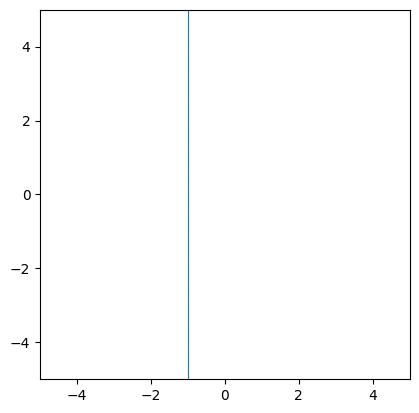

In [13]:
functionCoefficients = [0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

points = generateFunctionPoints(functionCoefficients, step=0.01)

if len(points) !=0:
    sns.scatterplot(x = points[:,0], y = points[:,1], legend=False,  marker='.', edgecolor=None, s=2)

    plt.gca().set_aspect('equal')

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

    plt.show()

## Calculating the projected coordinates on a hemishpere

100%|██████████| 2000/2000 [00:00<00:00, 37036.45it/s]


[[-0.14643157 -1.4643157 ]
 [-0.14656697 -1.46420402]
 [-0.14670262 -1.4640921 ]
 ...
 [-0.14683851  1.46397996]
 [-0.14670262  1.4640921 ]
 [-0.14656697  1.46420402]]


100%|██████████| 2000/2000 [00:00<00:00, 14598.76it/s]


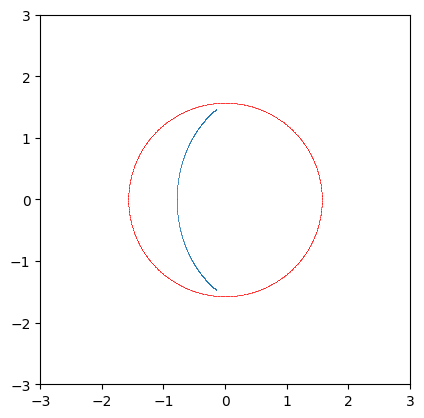

In [14]:
functionCoefficients = [0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
points = generateFunctionPoints(functionCoefficients, step=0.01)
proj_alpha = np.arctan2([y for _, y in points], [x for x, _ in points])
proj_radius = np.arctan(np.sqrt([x**2+y**2 for x, y in points]))
proj_x = np.cos(proj_alpha) * proj_radius
proj_y = np.sin(proj_alpha) * proj_radius
proj_points = np.array(list(zip(proj_x, proj_y)))
print(proj_points)

circleCoeffs = [0, 0, 0, 0, 1, 0, 1, 0, 0, -np.pi**2/4]
circlePoints = np.array(generateFunctionPoints(circleCoeffs, step=0.01))

sns.scatterplot(x = proj_points[:,0], y = proj_points[:,1], legend=False,  marker='.', edgecolor=None, s=1)
#sns.scatterplot(x = proj_points2[:,0], y = proj_points2[:,1], legend=False,  marker='.', color='Blue', edgecolor=None, s=1)
#sns.scatterplot(x = proj_points3[:,0], y = proj_points3[:,1], legend=False,  marker='.', color='Grey', edgecolor=None, s=1)
#sns.scatterplot(x = proj_points4[:,0], y = proj_points4[:,1], legend=False,  marker='.', color='DarkGrey', edgecolor=None, s=1)
sns.scatterplot(x = circlePoints[:,0], y = circlePoints[:,1], legend=False,  marker='.', color='Red', edgecolor=None, s=1)

plt.gca().set_aspect('equal')

plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

100%|██████████| 2000/2000 [00:00<00:00, 14133.44it/s]


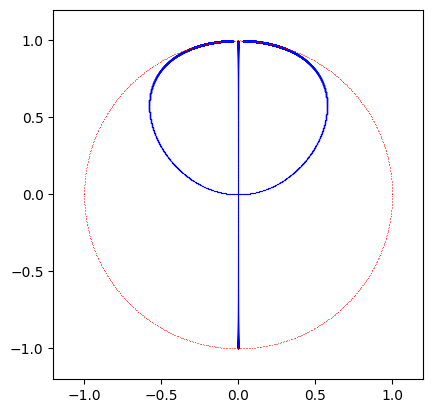

In [15]:
from math import sqrt

def projectPoints(points):
    proj_alpha = np.arctan2([y for _, y in points], [x for x, _ in points])
    proj_radius = [sqrt(x**2+y**2)/sqrt(x**2+y**2+1) for x, y in points]
    proj_x = np.cos(proj_alpha) * proj_radius
    proj_y = np.sin(proj_alpha) * proj_radius
    return np.array(list(zip(proj_x, proj_y)))

def generateProjectedPoints(functionCoefficients, step = 0.0025, start=-30, stop=30):
    points = generateFunctionPoints(functionCoefficients, start=start, stop=stop, step=step)
    return projectPoints(points)
    

def plotCurve(points, size=1, col='Blue', ax=None):
    return sns.scatterplot(x = points[:,0], y = points[:,1], legend=False,  marker='.', color=col, edgecolor=None, s=size, ax=ax)

line1 = generateProjectedPoints([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
plotCurve(line1, size=2)
line2 = generateProjectedPoints([0, 0, 0, 0, 1, 0, 0, 0, -1, 0])
plotCurve(line2, size=2)
circle = generateFunctionPoints([0, 0, 0, 0, 1, 0, 1, 0, 0, -1], step=0.01)
plotCurve(circle, col='Red')

plt.gca().set_aspect('equal')

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

plt.show()

## Proiezione inversa

100%|██████████| 140/140 [00:00<00:00, 28137.55it/s]


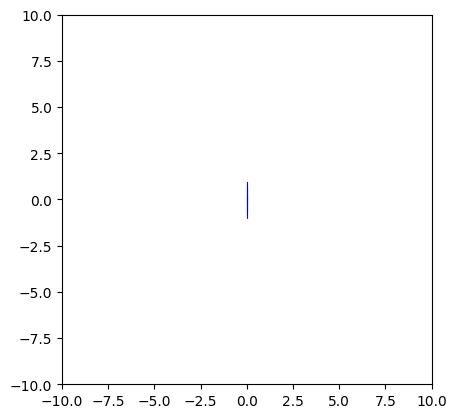

In [16]:
def generateDeprojectedPoints(functionCoefficients, step = 0.01):
    points = generateFunctionPoints(functionCoefficients, start = -0.7, stop = 0.7, step=step)
    proj_alpha = np.arctan2([y for _, y in points], [x for x, _ in points])
    deproj_radius = [sqrt(x**2 + y**2)/sqrt(1-(x**2+y**2)) if (x**2 + y**2 < 1) else 1e10 for x, y in points]
    proj_x = np.cos(proj_alpha) * deproj_radius
    proj_y = np.sin(proj_alpha) * deproj_radius
    return np.array(list(zip(proj_x, proj_y)))



line1 = generateDeprojectedPoints([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
#print(line1)

plotCurve(line1, size=2)

plt.gca().set_aspect('equal')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

### All curves

100%|██████████| 800/800 [00:00<00:00, 11934.07it/s]


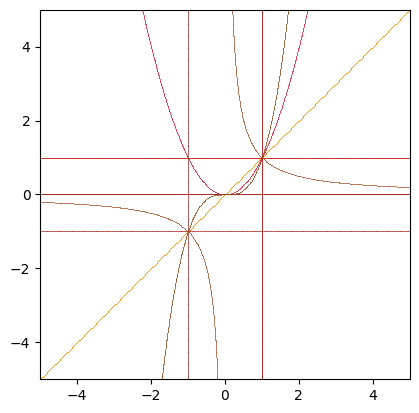

In [17]:
lineResolution = 0.025
lineSize = 1.5

plotCurve(generateFunctionPoints([0, 0, 0, 0, 0, 0, 0, 1, -1, 0], step=lineResolution), size = lineSize, col = 'darkorange')
plotCurve(generateFunctionPoints([0, 0, 0, 0, 0, 0, 0, 0, -1, 0], step=lineResolution), size = lineSize, col = 'orange')
plotCurve(generateFunctionPoints([0, 0, 0, 0, 0, 0, 1, 0, -1, 0], step=lineResolution), size = lineSize, col = 'orangered')
plotCurve(generateFunctionPoints([0, 0, 0, 0, 0, 1, 0, 0, -1, 0], step=lineResolution), size = lineSize, col = 'red')
plotCurve(generateFunctionPoints([0, 0, 0, 0, 1, 0, 0, 0, -1, 0], step=lineResolution), size = lineSize, col = 'crimson')
plotCurve(generateFunctionPoints([0, 0, 0, 1, 0, 0, 0, 0, -1, 0], step=lineResolution), size = lineSize, col = 'firebrick')
plotCurve(generateFunctionPoints([0, 0, 1, 0, 0, 0, 0, 0, -1, 0], step=lineResolution), size = lineSize, col = 'sienna')
plotCurve(generateFunctionPoints([0, 1, 0, 0, 0, 0, 0, 0, -1, 0], step=lineResolution), size = lineSize, col = 'brown')
plotCurve(generateFunctionPoints([1, 0, 0, 0, 0, 0, 0, 0, -1, 0], step=lineResolution), size = lineSize, col = 'saddlebrown')

plt.gca().set_aspect('equal')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

100%|██████████| 140/140 [00:00<00:00, 10015.39it/s]


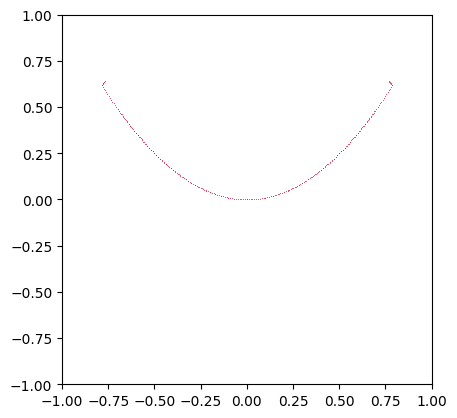

In [18]:
lineResolution = 0.01
lineSize = 1.5

plotCurve(projectPoints(generateDeprojectedPoints([0, 0, 0, 0, 1, 0, 0, 0, -1, 0], step=lineResolution)), size = lineSize, col = 'crimson')

plt.gca().set_aspect('equal')

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()

In [19]:
def generateDeprojectedPoints(functionCoefficients, start = -1, stop=1, step = 0.01):
    points = generateFunctionPoints(functionCoefficients, start=start, stop=stop, step=step)
    proj_alpha = np.arctan2([y for _, y in points], [x for x, _ in points])
    deproj_radius = np.tan(np.arcsin([sqrt(x**2 + y**2) for x, y in points]))
    proj_x = np.cos(proj_alpha) * deproj_radius
    proj_y = np.sin(proj_alpha) * deproj_radius
    return np.array(list(zip(proj_x, proj_y)))

100%|██████████| 200/200 [00:00<00:00, 14288.45it/s]
C:\Users\mirto\AppData\Local\Temp\ipykernel_13172\2043572557.py:4: RuntimeWarning: invalid value encountered in arcsin
  deproj_radius = np.tan(np.arcsin([sqrt(x**2 + y**2) for x, y in points]))


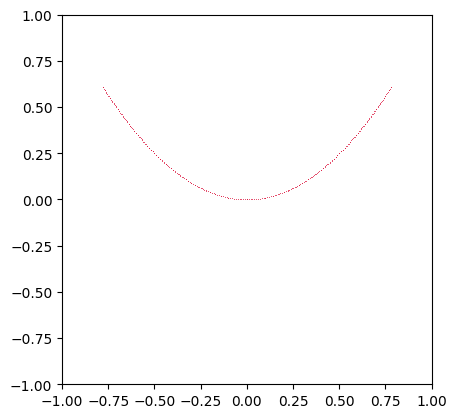

In [20]:
lineResolution = 0.01
lineSize = 1.5

#plotCurve(projectPoints(generateDeprojectedPoints([0, 0, 0, 0, 0, 0, 0, 1, -1, 0], step=lineResolution)), size = lineSize, col = 'darkorange')
#plotCurve(projectPoints(generateDeprojectedPoints([0, 0, 0, 0, 0, 0, 0, 0, -1, 0], step=lineResolution)), size = lineSize, col = 'orange')
#plotCurve(projectPoints(generateDeprojectedPoints([0, 0, 0, 0, 0, 0, 1, 0, -1, 0], step=lineResolution)), size = lineSize, col = 'orangered')
#plotCurve(projectPoints(generateDeprojectedPoints([0, 0, 0, 0, 0, 1, 0, 0, -1, 0], step=lineResolution)), size = lineSize, col = 'red')
plotCurve(projectPoints(generateDeprojectedPoints([0, 0, 0, 0, 1, 0, 0, 0, -1, 0], step=lineResolution)), size = lineSize, col = 'crimson')
#plotCurve(projectPoints(generateDeprojectedPoints([0, 0, 0, 1, 0, 0, 0, 0, -1, 0], step=lineResolution)), size = lineSize, col = 'firebrick')
#plotCurve(projectPoints(generateDeprojectedPoints([0, 0, 1, 0, 0, 0, 0, 0, -1, 0], step=lineResolution)), size = lineSize, col = 'sienna')
#plotCurve(projectPoints(generateDeprojectedPoints([0, 1, 0, 0, 0, 0, 0, 0, -1, 0], step=lineResolution)), size = lineSize, col = 'brown')
#plotCurve(projectPoints(generateDeprojectedPoints([1, 0, 0, 0, 0, 0, 0, 0, -1, 0], step=lineResolution)), size = lineSize, col = 'saddlebrown')

plt.gca().set_aspect('equal')

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()

In [21]:
def generateGridPoints(step=0.01, radius=1):
    points = []
    for x in np.arange(-radius, radius, step):
        for y in np.arange(-radius, radius, step):
            if x**2+y**2 > radius**2: continue
            points.append((x,y))
    return np.array(points)


In [22]:
def generateDeprojectedGrid(step = 0.01):
    points = generateGridPoints(step=step)
    proj_alpha = np.arctan2([y for _, y in points], [x for x, _ in points])
    deproj_radius = np.tan(np.arcsin([sqrt(x**2 + y**2) for x, y in points]))
    proj_x = np.cos(proj_alpha) * deproj_radius
    proj_y = np.sin(proj_alpha) * deproj_radius
    return np.array(list(zip(proj_x, proj_y)))

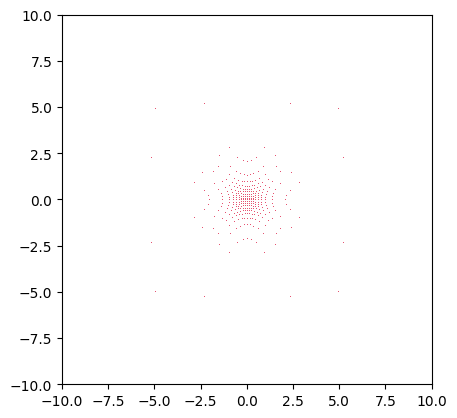

In [23]:
lineResolution = 0.1
lineSize = 1.5

plotCurve(generateDeprojectedGrid(step=lineResolution), size = lineSize, col = 'crimson')

plt.gca().set_aspect('equal')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

In [24]:
def testPoints(coefficients, points):
    testedPoints = []
    a, b, c, d, e, f, g, h, i ,j = coefficients
    for x, y in tqdm(points):
        yCoefficients = [d, g + c*x, i + b*(x**2)+f*x, j + a*(x**3)+e*(x**2)+h*x]
        for y_coeff in cubicSolve(yCoefficients):
            if np.isclose(y_coeff, y, rtol=.01):
                testedPoints.append((x,y))
    for y, x in tqdm(points):
        xCoefficients = [a, e + b*y, h + c*(y**2)+f*y, j + d*(y**3)+g*(y**2)+i*y]
        for x_coeff in cubicSolve(xCoefficients):
            if np.isclose(x_coeff, x, rtol=.01):
                testedPoints.append((x,y))
    return np.array(testedPoints)

100%|██████████| 313/313 [00:00<00:00, 8934.62it/s]


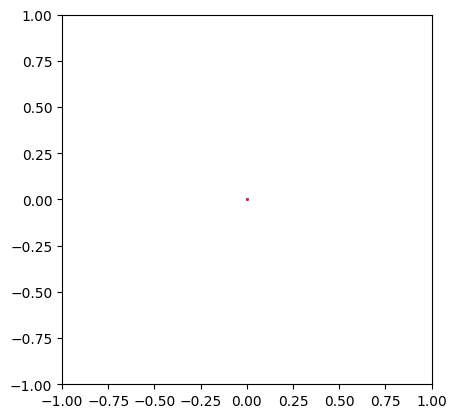

In [25]:
lineResolution = 0.1
lineSize = 10

plotCurve(projectPoints(testPoints([0, 0, 0, 0, 1, 0, 0, 0, -1, 0], generateDeprojectedGrid(step=lineResolution))), size = lineSize, col = 'crimson')

plt.gca().set_aspect('equal')

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()

In [26]:
testPoints([0, 0, 0, 0, 1, 0, 0, 0, -1, 0], generateDeprojectedGrid(step=0.01))

100%|██████████| 31403/31403 [00:03<00:00, 9602.21it/s] 


array([[-8.64231770e-01,  7.42936083e-01],
       [-8.74237242e-01,  7.66874774e-01],
       [-1.13411784e+00,  1.29329228e+00],
       [-1.16472151e+00,  1.34862491e+00],
       [-8.05026573e-01,  6.46896353e-01],
       [-1.22114825e+00,  1.50462909e+00],
       [-7.61907332e-01,  5.81820144e-01],
       [-1.29961554e+00,  1.70131489e+00],
       [-7.24001106e-01,  5.22889688e-01],
       [-6.94607981e-01,  4.84915006e-01],
       [-6.67380061e-01,  4.49198118e-01],
       [-1.49366097e+00,  2.24049146e+00],
       [-6.42030258e-01,  4.15431344e-01],
       [-6.18321483e-01,  3.83359319e-01],
       [-1.63168833e+00,  2.64333510e+00],
       [-5.96055893e-01,  3.52767774e-01],
       [-5.57199099e-01,  3.08237800e-01],
       [-5.39907591e-01,  2.93428038e-01],
       [-1.97765293e+00,  3.91035920e+00],
       [-4.89712587e-01,  2.39161961e-01],
       [-4.74462701e-01,  2.25934619e-01],
       [-4.59601978e-01,  2.12986283e-01],
       [-4.17104188e-01,  1.75622816e-01],
       [-4.

## Deproject x-axis line

In [27]:
def deprojectLine(step = 0.01, radius=1):
    points = np.arange(-radius, radius, step)
    deproj_points = np.tan(np.arcsin(points))
    return np.array(deproj_points)

In [28]:
def generateFunctionOnDeprojectedPoints(coefficients, radius=1, step=0.01, showTqdm=True):
    '''
    a*x^3 + b*x^2y + c*xy^2 + d*y^3 + e*x^2 + f*xy + g*y^2 + h*x + i*y + j*1 = 0
    '''
    points = deprojectLine(step=step, radius=radius)
    validPoints = []
    a, b, c, d, e, f, g, h, i ,j = coefficients
    for x in tqdm(points, disable=not showTqdm):
        yCoefficients = [d, g + c*x, i + b*(x**2)+f*x, j + a*(x**3)+e*(x**2)+h*x]
        for y in cubicSolve(yCoefficients):
            validPoints.append((x,y))
    for y in tqdm(points, disable=not showTqdm):
        xCoefficients = [a, e + b*y, h + c*(y**2)+f*y, j + d*(y**3)+g*(y**2)+i*y]
        for x in cubicSolve(xCoefficients):
            validPoints.append((x,y))
    return np.array(validPoints)


100%|██████████| 800/800 [00:00<00:00, 12697.51it/s]


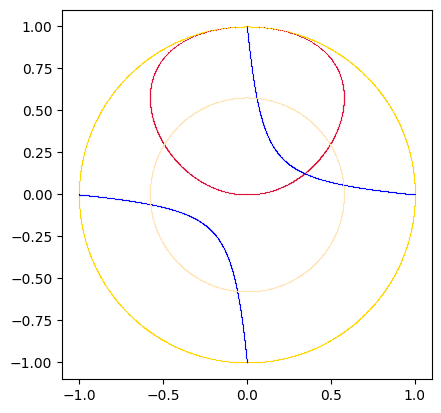

In [29]:
lineResolution = 0.0025
lineSize = 2

plotCurve(generateFunctionPoints([0, 0, 0, 0, 1, 0, 1, 0, 0, -1], step=lineResolution), size = lineSize, col='gold')
plotCurve(projectPoints(generateFunctionOnDeprojectedPoints([0, 0, 0, 0, 1, 0, 0, 0, -1, 0], step=lineResolution)), size = lineSize, col = 'crimson')
plotCurve(projectPoints(generateFunctionOnDeprojectedPoints([0, 0, 0, 0, 0, 20, 0, 0, 0, -1], step=lineResolution)), size = lineSize, col = 'blue')
plotCurve(projectPoints(generateFunctionOnDeprojectedPoints([0, 0, 0, 0, 1, 0, 1, 0, 0, -.5], step=lineResolution)), size = lineSize, col = 'moccasin')


plt.gca().set_aspect('equal')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

plt.show()

### Curve libere

100%|██████████| 800/800 [00:00<00:00, 11764.82it/s]


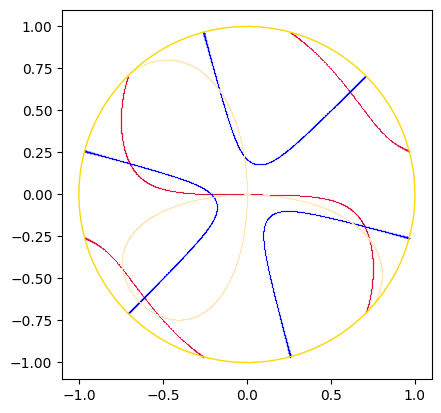

In [30]:
lineResolution = 0.0025
lineSize = 2

plotCurve(projectPoints(generateFunctionOnDeprojectedPoints([1, -3, -3, 1, 0, 0, 0, 0, 6, 0], step=lineResolution)), size = lineSize, col = 'crimson')
plotCurve(projectPoints(generateFunctionOnDeprojectedPoints([-1, -3, 3, 1, 0, 0, 0, 0, 0, -.01], step=lineResolution)), size = lineSize, col = 'blue')
plotCurve(projectPoints(generateFunctionOnDeprojectedPoints([1, 0, 0, 1, 0, 3, 0, 0, 0, 0], step=lineResolution)), size = lineSize, col = 'moccasin')
circle = plt.Circle(xy=(0, 0), radius=1, color='gold', fill=False)
plt.gca().add_patch(circle)

plt.gca().set_aspect('equal')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

plt.show()

## Curve cubiche secondo la classificazione di newton

In [31]:
import re

def parseEquation(equation):
    coeffs = re.search(r'(?:(-?\d*\.*\d+)x\^3)?(?: \+ )?(?:(-?\d*\.*\d+)x\^2y)?(?: \+ )?(?:(-?\d*\.*\d+)xy\^2)?(?: \+ )?(?:(-?\d*\.*\d+)y\^3)?(?: \+ )?(?:(-?\d*\.*\d+)x\^2)?(?: \+ )?(?:(-?\d*\.*\d+)xy)?(?: \+ )?(?:(-?\d*\.*\d+)y\^2)?(?: \+ )?(?:(-?\d*\.*\d+)x)?(?: \+ )?(?:(-?\d*\.*\d+)y)?(?: \+ )?(?:(-?\d*\.*\d+))?', equation)
    return [0 if c is None else float(c) for c in coeffs.groups()]

parseEquation('-0.1x^3 + 1xy^2 + 1x^2 + 5x + 0.4y + 3 = 0')

[-0.1, 0, 1.0, 0, 1.0, 0, 0, 5.0, 0.4, 3.0]

In [32]:
def drawAffineAndProjected(equation, lineResolution = 0.0025, lineSize = 1.5, affineLim=5, showTdqm = False):
    coefficents = parseEquation(equation)

    fig, ax = plt.subplots(1,2)
    #Affine
    plotCurve(generateFunctionPoints(coefficents, step=lineResolution, showTqdm=showTdqm), size = lineSize, col = 'crimson', ax=ax[0])

    ax[0].set_aspect('equal')
    ax[0].set_xlim(-affineLim, affineLim)
    ax[0].set_ylim(-affineLim, affineLim)

    #Projected
    plotCurve(projectPoints(generateFunctionOnDeprojectedPoints(coefficents, step=lineResolution, showTqdm=showTdqm)), size = lineSize, col = 'crimson', ax=ax[1])
    circle = plt.Circle(xy=(0, 0), radius=1, color='gold', fill=False)
    ax[1].add_patch(circle)

    ax[1].set_aspect('equal')
    ax[1].set_xlim(-1.1, 1.1)
    ax[1].set_ylim(-1.1, 1.1)

    return plt.show()

$x^3 + xy^2 + x^2 + Hx + Iy + J = 0 \\
-∞ < H < ∞,\qquad 0 \leq I < ∞,\qquad -∞ < J < ∞$

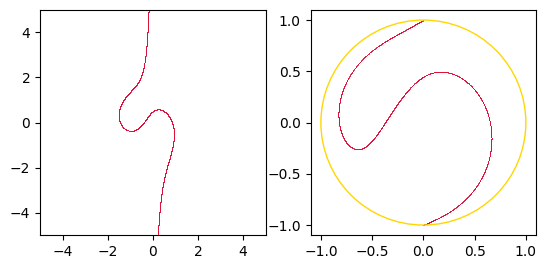

In [33]:
drawAffineAndProjected('1x^3 + 1xy^2 + 1x^2 + -1x + 1y + -.5')

$x^3 + xy^2 + y + Hx + J = 0 \\
-∞ < H < ∞,\qquad -∞ < J < ∞$

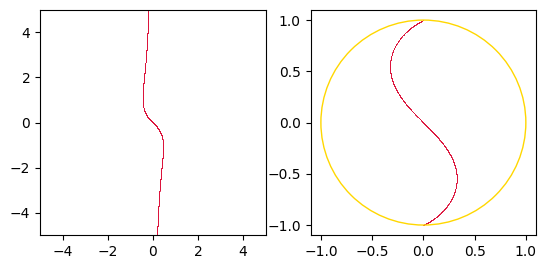

In [34]:
drawAffineAndProjected('1x^3 + 1xy^2 + 1x + 1y + 0')

$x^3 + xy^2 + x + J = 0 \\
0 \leq J < ∞$

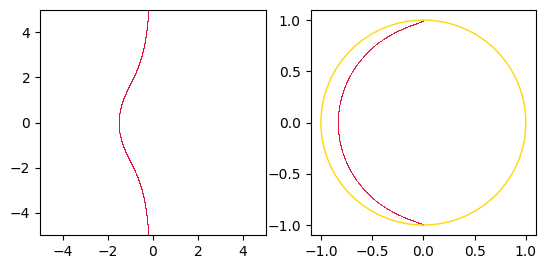

In [35]:
drawAffineAndProjected('1x^3 + 1xy^2 + 1x + 5')

$x^3 + xy^2 + 1 = 0$

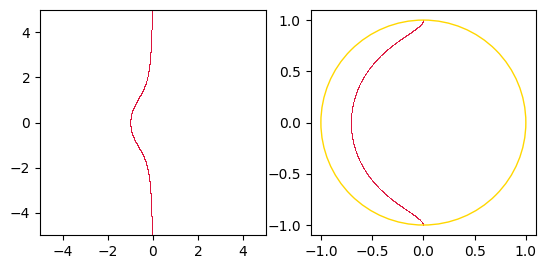

In [36]:
drawAffineAndProjected('1x^3 + 1xy^2 + 1')

[Spezzata] $x^3 + xy^2 = 0$

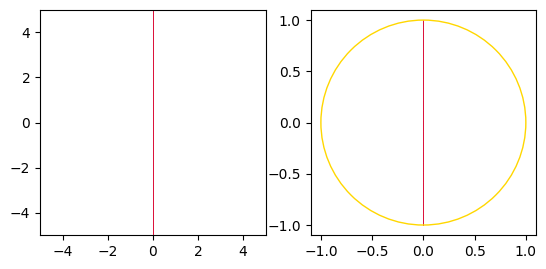

In [37]:
drawAffineAndProjected('1x^3 + 1xy^2')

$x^3 - xy^2 - x^2 + Hx + Iy + J = 0 \\
-∞ < H < ∞,\qquad -∞ < I \leq 0 ,\qquad -∞ < J < ∞$

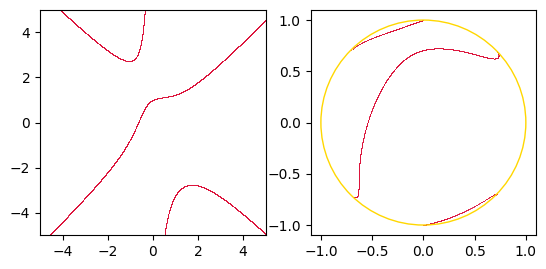

In [38]:
drawAffineAndProjected('1x^3 + -1xy^2 + -1x^2 + 2x + -2y + 2')

$x^3 - xy^2 + 1 = 0$

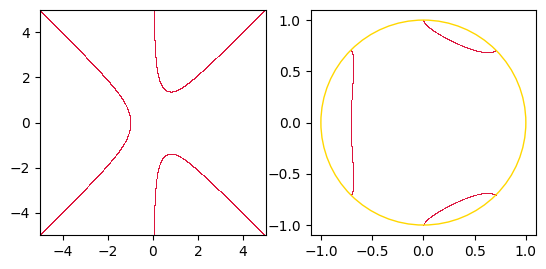

In [39]:
drawAffineAndProjected('1x^3 + -1xy^2 + 1')

$x^3 - xy^2 = 0$

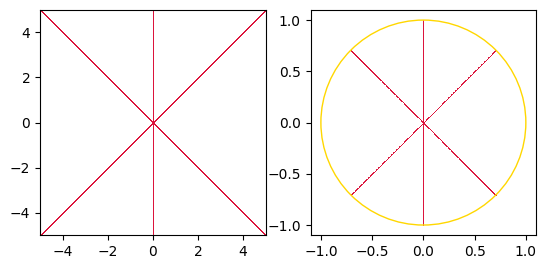

In [40]:
drawAffineAndProjected('1x^3 + -1xy^2')

[Not in list] $xy^2 + y^2 - x + y + J = 0 \\
-∞ < J < ∞$

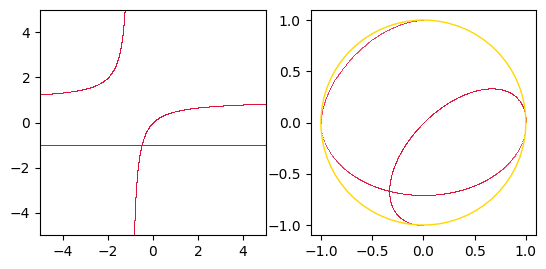

In [41]:
drawAffineAndProjected('1xy^2 + 1y^2 + -1x + 1y + 0')

[Not listed] $xy^2 + y^2 + y + J = 0 \\
-∞ < J < ∞$

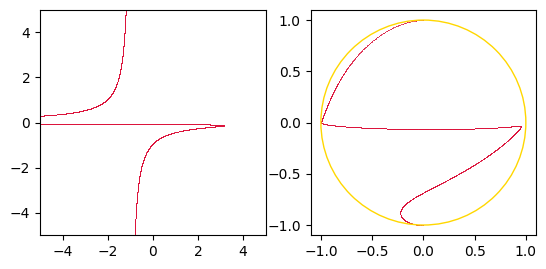

In [42]:
drawAffineAndProjected('1xy^2 + 1y^2 + 1y + 0.06')

$x^2y + y^2 - x + y + J = 0 \\
-∞ < J < ∞$

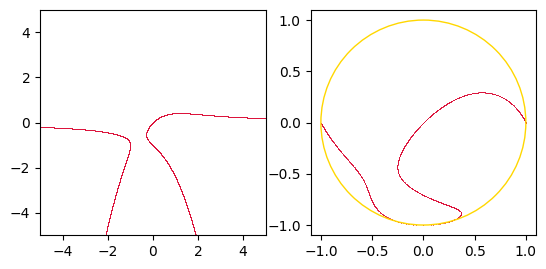

In [43]:
drawAffineAndProjected('1x^2y + 1y^2 + -1x + 1y + 0')

$x^2y + y^2 + y + J = 0 \\
-∞ < J < ∞$

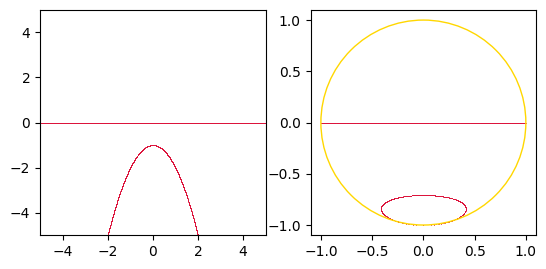

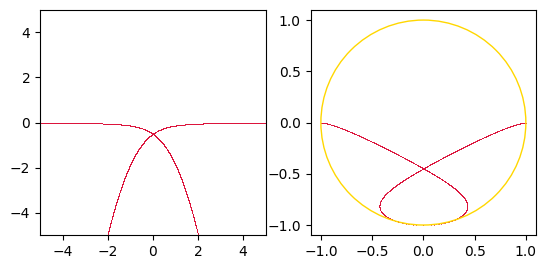

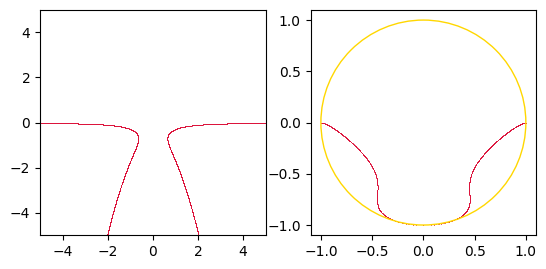

In [44]:
drawAffineAndProjected('1x^2y + 1y^2 + 1y + 0')
drawAffineAndProjected('1x^2y + 1y^2 + 1y + 0.25')
drawAffineAndProjected('1x^2y + 1y^2 + 1y + 0.5')


$x^2y + y^2 - 1 = 0$

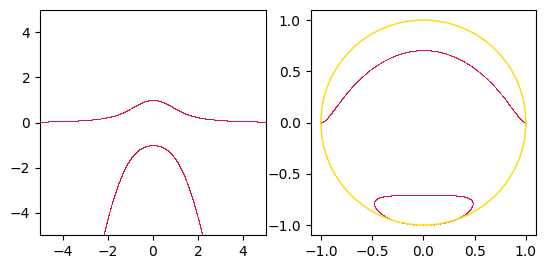

In [45]:
drawAffineAndProjected('1x^2y + 1y^2 + -1')

$x^2y + y^2= 0$

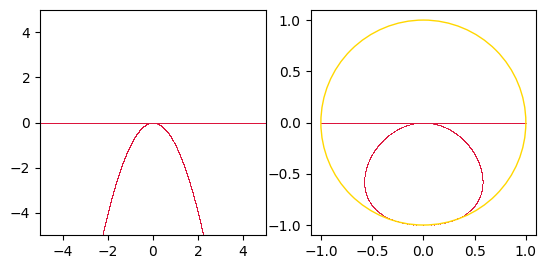

In [46]:
drawAffineAndProjected('1x^2y + 1y^2')

$x^2y - x + y + J = 0 \\
0 \leq J < ∞$

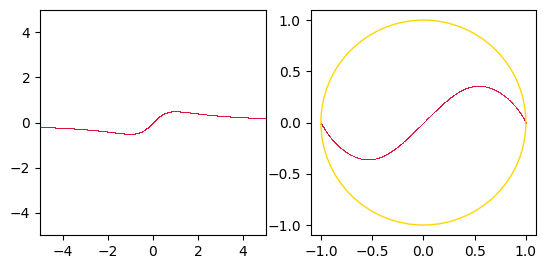

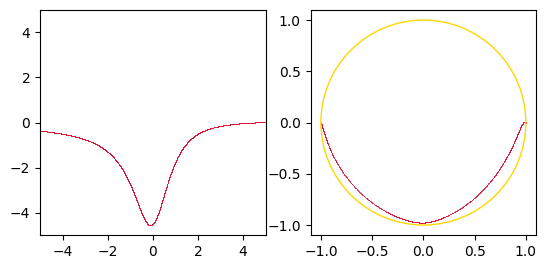

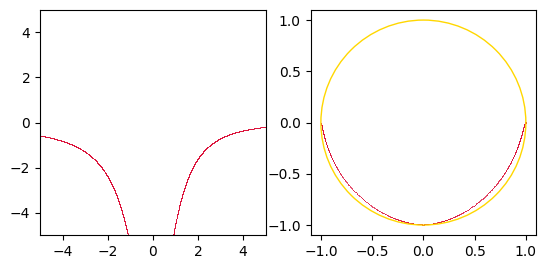

In [47]:
drawAffineAndProjected('1x^2y + -1x + 1y + 0')
drawAffineAndProjected('1x^2y + -1x + 1y + 4.5')
drawAffineAndProjected('1x^2y + -1x + 1y + 10')

$x^2y - x = 0$

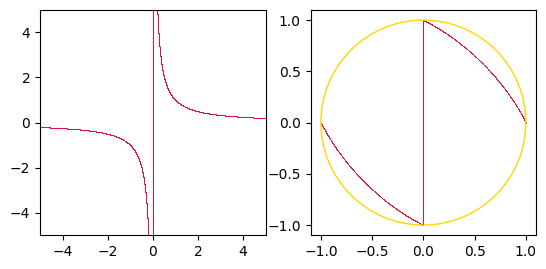

In [48]:
drawAffineAndProjected('1x^2y + -1x')

$x^2y - x + 1= 0$


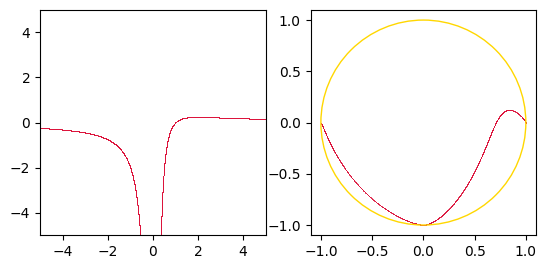

In [49]:
drawAffineAndProjected('1x^2y + -1x + 1')


[Spezzata] $x^2y + y = 0$


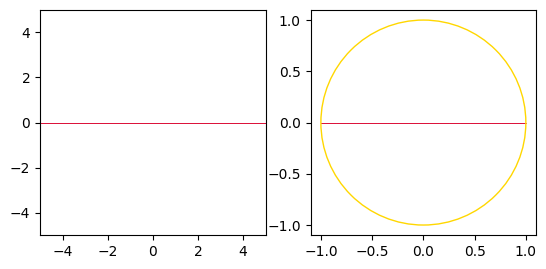

In [50]:
drawAffineAndProjected('1x^2y + 1y')

$x^2y + y + 1 = 0$

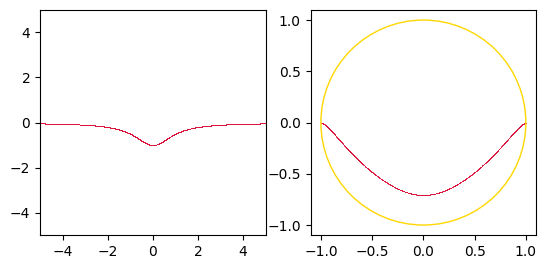

In [51]:
drawAffineAndProjected('1x^2y + 1y + 1')

$x^2y = 0$

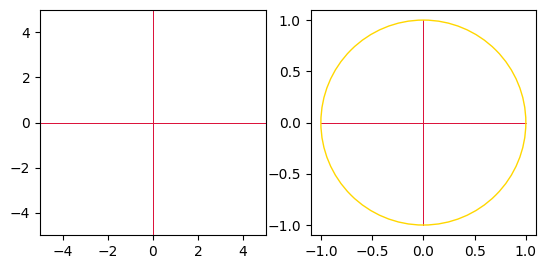

In [52]:
drawAffineAndProjected('1x^2y')

$x^2y + 1= 0$

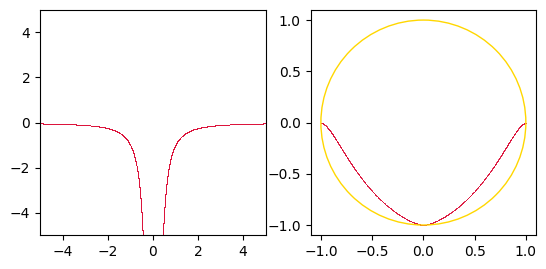

In [53]:
drawAffineAndProjected('1x^2y + 1')

$x^3 - y^2 + x + J = 0\\
-\infty \lt J \lt \infty$

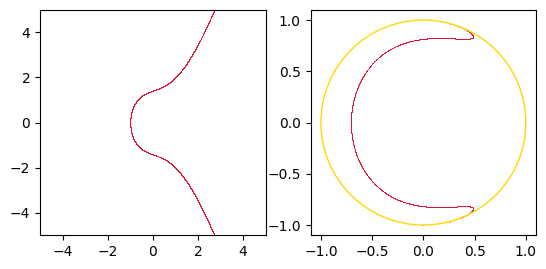

In [60]:
drawAffineAndProjected('1x^3 + -1y^2 + 1x + 2')

$x^3 - y^2 - x + J = 0\\
-\infty \lt J \lt \infty$

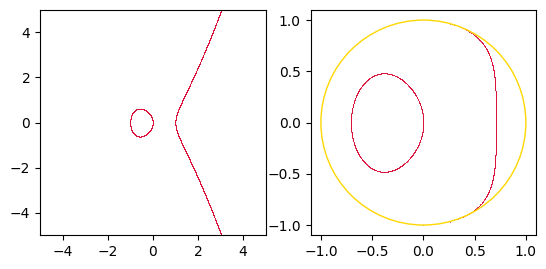

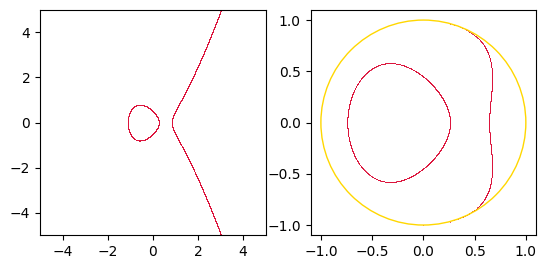

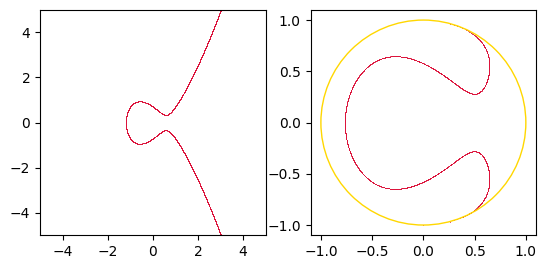

In [65]:
drawAffineAndProjected('1x^3 + -1y^2 + -1x + 0')
drawAffineAndProjected('1x^3 + -1y^2 + -1x + .25')
drawAffineAndProjected('1x^3 + -1y^2 + -1x + .5')

$x^3 - y^2 + 1 = 0$

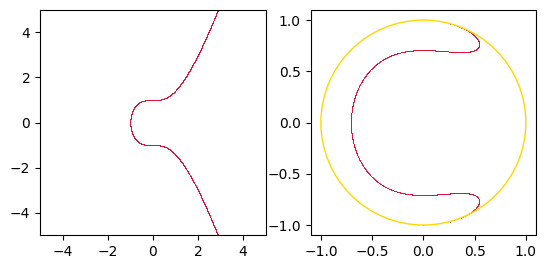

In [66]:
drawAffineAndProjected('1x^3 + -1y^2 + 1')

$x^3 - y^2 = 0$

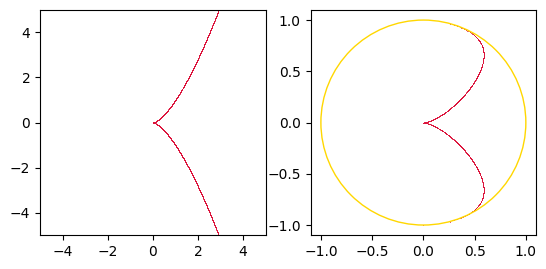

In [67]:
drawAffineAndProjected('1x^3 + -1y^2')

$x^3 - y = 0$

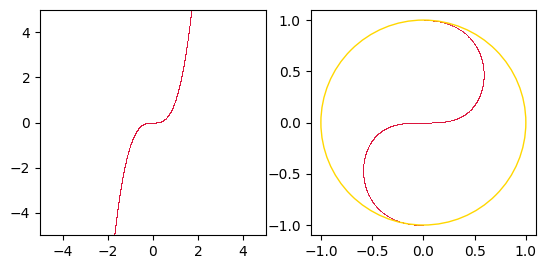

In [68]:
drawAffineAndProjected('1x^3 + -1y')

[Spezzata] $x^3 + x + K = 0\\
0 \leq K \lt \infty$

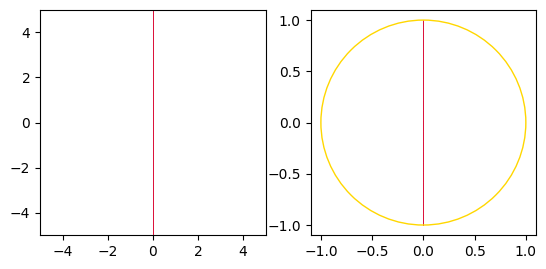

In [70]:
drawAffineAndProjected('1x^3 + 1x + 0')

$x^3 - xy = 0$

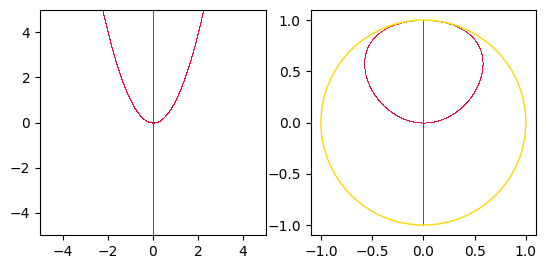

In [71]:
drawAffineAndProjected('1x^3 + -1xy')

$x^3 - xy + 1 = 0$

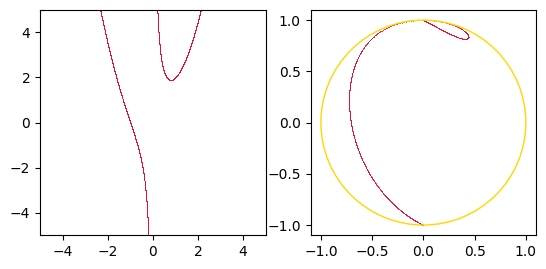

In [72]:
drawAffineAndProjected('1x^3 + -1xy + 1')

[Spezzata] $x^3 + 1 = 0$

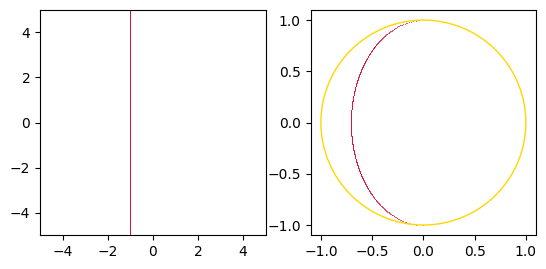

In [73]:
drawAffineAndProjected('1x^3 + 1')

[Spezzata] $x^3 = 0$